**CPSC 483 <br>
PROJECT #2 <br>
BRENDON LINTHURST <br>
4/30/2020 <br>**

# QUESTION #1: Use logistic regression to fit and score a binary classifier to dataset 1. How accurate are the model’s predictions?

In [137]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Manually added column to dataset1.csv for feature vectors and target outside of jupyter

# Read dataset and create vectors
df = pd.read_csv("dataset1.csv")
x1 = df[['x1','x2']]
t1 = np.ravel(df[['target']])

# Logistic Regression
logReg = LogisticRegression().fit(x1, t1)
score = logReg.score(x1, t1)
print(score)


1.0


ANSWER #1: The score is 100 which indicates the model is accurate.

# QUESTION #2: Repeat experiment 1 for dataset 2. How well does it score?

In [138]:
# Manually added column to dataset2.csv for feature vectors and target outside of jupyter

# Read dataset and create vectors for dataset 2
df = pd.read_csv("dataset2.csv")
x2 = df[['x1','x2']]
t2 = np.ravel(df[['target']])

# Logistic Regression
logReg2 = LogisticRegression().fit(x2, t2)
score2 = logReg2.score(x2, t2)
print(score2)

0.525


ANSWER #2: The score is 52.5, which is a less accurate score than dataset 1.

# QUESTION #3: Create scatterplots for datasets 1 and 2, plot points from class 0 with a different colot and marker from points in class 1... What accounts for discrepencies?

[Text(0.5, 1.0, 'DATASET#2, X2 vs X1, RED: 0 BLUE: 1')]

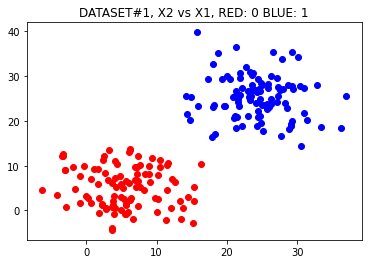

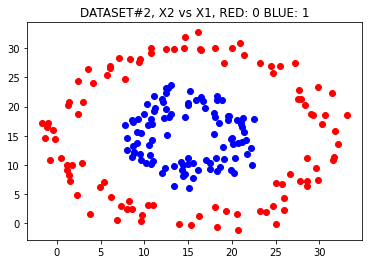

In [139]:
#Import libraries
import matplotlib.pyplot as plt

# Read CSV
df1 = pd.read_csv("dataset1.csv")
df2 = pd.read_csv("dataset2.csv")

# Instantiate dataset classifiers
dataset1_class_0 = df1.loc[df1['target'] == 0]
dataset2_class_0 = df2.loc[df2['target'] == 0]
dataset1_class_1 = df1.loc[df1['target'] == 1]
dataset2_class_1 = df2.loc[df2['target'] == 1]

# Plot
fig, ax = plt.subplots()
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.set(title="DATASET#1, X2 vs X1, RED: 0 BLUE: 1")

fig, ax = plt.subplots()
#ax2 = plt.subplots()
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.set(title="DATASET#2, X2 vs X1, RED: 0 BLUE: 1")



ANSWER #3: Dataset 1 had a high score for logistic regression and shows because the data can be classified easy with a diagonol line.

Dataset 2 has no such line as indicated by the score of 52.5. Looking at the plot and data, it is clear that we need a better classification model.

We can account for this by looking at the x1 and x2 values of dataset 2 when the target is 1 (blue). They are trending toward central locations on our plot while the target 0 (red) is highly variant.

# QUESTION #4: Fit and score Guassian Naive Bayes classifiers for each dataset. How well do they score compare to logistic regression?

In [140]:
# Import library
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()

# Fit datasets 1 and 2
GNB_data_1 = GaussianNB().fit(x1, t1)
GNB_data_2 = GaussianNB().fit(x2, t2)

# Score datasets 1 and 2
GNB_score_data_1 = GNB_data_1.score(x1, t1)
GNB_score_data_2 = GNB_data_2.score(x2, t2)

# Print GNB scores
print("Gaussian NB score for dataset 1: ", GNB_score_data_1)
print("Guassian NB score for dataset 2: ", GNB_score_data_2)

Gaussian NB score for dataset 1:  1.0
Guassian NB score for dataset 2:  1.0


ANSWER #4: It looks like Gaussian Naive Bayes is the superior model for dataset 2 with a score of 100 compared to 52.5 from Logistic regression.

It is the same score as logistic regression for data 1.

# QUESTION #5: Repeat experiment 4 with KNN classifiers.

In [141]:
# Import library
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Fit datasets 1 and 2
KNN_data_1 = KNeighborsClassifier().fit(x1, t1)
KNN_data_2 = KNeighborsClassifier().fit(x2, t2)

# Score datasets 1 and 2
KNN_score_1 = KNN_data_1.score(x1, t1)
KNN_score_2 = KNN_data_2.score(x2, t2)

# Print KNN scores
print("K-Nearest Neighbor score for dataset 1: ", KNN_score_1)
print("K-Nearest Neighbor score for dataset 2: ", KNN_score_2)

K-Nearest Neighbor score for dataset 1:  1.0
K-Nearest Neighbor score for dataset 2:  1.0


ANSWER #5: For dataset 1, the score is equal to logistic regression.

Dataset 2, we have discovered a superior model to logistic regression indicated by the higher score. I think this makes sense because the logistic regression plot is a circle with a line going through it.

# QUESTION #6: Using the second half of the Python code for Figure 9.2 - Simple Gaussian Naive Bayes Classification from Statistics, Data Mining, and Machine Learning in Astronomy, 2nd Edition as a guide, plot the decision boundaries for each classifier and dataset.

[Text(0.5, 1.0, 'DATASET#2 K-NEAREST NEIGHBOR')]

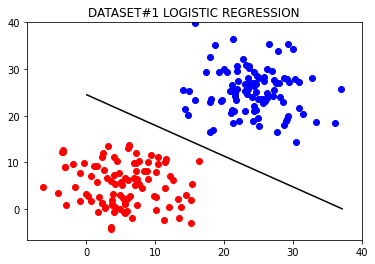

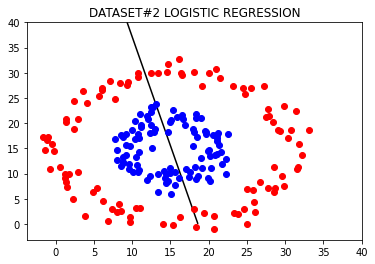

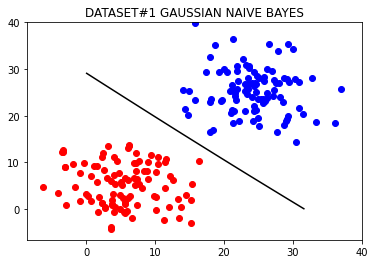

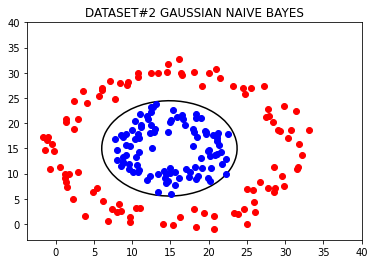

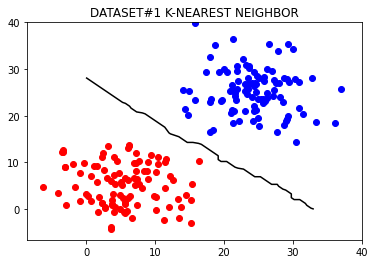

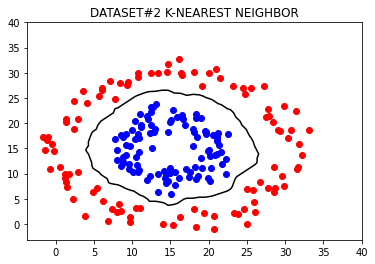

In [148]:
# Re-read the dataset
df = pd.read_csv("dataset1.csv")
x1 = df[['x1','x2']].to_numpy()

# Plot 1
xlim = 0
ylim = 40
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim))
Z = logReg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='black')
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.set(title="DATASET#1 LOGISTIC REGRESSION")

# Plot 2
xlim = 0
ylim = 40
xx, yy = np.meshgrid(np.linspace(xlim, ylim), np.linspace(xlim, ylim))
Z = logReg2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='k')
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.set(title="DATASET#2 LOGISTIC REGRESSION")

# Plot 1 (GNB)
Z = GNB_data_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='k')
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.set(title="DATASET#1 GAUSSIAN NAIVE BAYES")

# Plot 2 (GNB)
Z = GNB_data_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='k')
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.set(title="DATASET#2 GAUSSIAN NAIVE BAYES")

# Plot 1 (KNN)
Z = KNN_data_1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='k')
ax.plot(dataset1_class_0[['x1']], dataset1_class_0[['x2']], 'ro')
ax.plot(dataset1_class_1[['x1']], dataset1_class_1[['x2']], 'bo')
ax.set(title="DATASET#1 K-NEAREST NEIGHBOR")

# Plot 2 (KNN)
Z = KNN_data_2.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
fig, ax = plt.subplots()
#ax.scatter(x1[:, 0], x1[:, 1], cmap=plt.cm.binary, zorder=2)
ax.contour(xx, yy, Z, [0.5], colors='k')
ax.plot(dataset2_class_0[['x1']], dataset2_class_0[['x2']], 'ro')
ax.plot(dataset2_class_1[['x1']], dataset2_class_1[['x2']], 'bo')
ax.set(title="DATASET#2 K-NEAREST NEIGHBOR")